In [2]:
import geopandas as gpd



In [3]:
from owslib.wfs import WebFeatureService
from requests import Request
url = 'https://service.pdok.nl/ez/fysischgeografischeregios/wfs/v1_0?&service=wfs'
# Initialize
wfs = WebFeatureService(url=url)

# Service provider 
print(wfs.identification.title)

# Get WFS version
print(wfs.version)

# Available methods
print([operation.name for operation in wfs.operations])

# Available data layers
print(list(wfs.contents))

# Print all metadata of all layers
for layer, meta in wfs.items():
    print(meta.__dict__)
    
layer_name = list(wfs.contents)[-1]

# Specify the parameters for fetching the data
# Count: specificies amount of rows to return (e.g. 10000 or 100)
# startIndex: specifies at which offset to start returning rows
params = dict(  version="1.0.0",request='GetFeature',
      typeName=layer_name, outputFormat='application/json', count=1000, startIndex=0)

# Parse the URL with parameters
wfs_request_url = Request('GET', url, params=params).prepare().url

# Read data from URL
data = gpd.read_file(wfs_request_url)

Fysisch Geografische Regio&#x27;s WFS
1.0.0
['GetCapabilities', 'DescribeFeatureType', 'GetFeature']
['fysischgeografischeregios']
{'auth': <Authentication shared=False username=None password=None cert=None verify=True auth_delegate=None>, 'headers': <Authentication shared=False username=None password=None cert=None verify=True auth_delegate=None>, 'id': 'fysischgeografischeregios', 'title': 'Fysisch Geografische Regio&#x27;s', 'abstract': 'Indeling van Nederland in Fysisch-Geografische Regio&#x27;s. Voor de omgrenzing van de Regio&#x27;s is een zo consistent mogelijke lijst van beslisregels gehanteerd, vooral gebaseerd op de bodemtypen. Dit bestand is een update van de FGR-versie van 1997.', 'keywords': ['\n          biogeografische gebieden\n          bodem\n        '], 'boundingBox': (-25000.0, 250000.0, 280000.0, 860000.0, urn:ogc:def:crs:EPSG::28992), 'boundingBoxWGS84': (2.8656003650954593, 50.21286256699054, 7.374025505327545, 55.70542748014488), 'crsOptions': [urn:ogc:def:crs:E

In [4]:
fgr = data.copy()

In [5]:
fgr

,id,objectid,afk,fgr,geometry
0,fysischgeografischeregios.f33e0150-9af7-4a95-8...,79,du,Duinen,"POLYGON ((105147.000 526863.188, 105092.000 52..."
1,fysischgeografischeregios.c963d959-d295-492b-a...,80,du,Duinen,"POLYGON ((111314.000 552409.000, 111289.008 55..."
2,fysischgeografischeregios.cb9746da-1b31-40f7-b...,96,du,Duinen,"POLYGON ((119244.333 577690.288, 119230.924 57..."
3,fysischgeografischeregios.e3b8d3bd-e9bc-456d-a...,101,du,Duinen,"POLYGON ((133749.490 591283.817, 133726.437 59..."
4,fysischgeografischeregios.2b3f47fb-2acb-4b6b-9...,108,du,Duinen,"POLYGON ((164145.044 606590.552, 164118.586 60..."
...,...,...,...,...,...
953,fysischgeografischeregios.b54e524b-f5ed-468c-8...,954,zk,Zeekleigebied,"POLYGON ((174337.016 606013.000, 174327.000 60..."
954,fysischgeografischeregios.ae4be1aa-b161-4c86-9...,955,zk,Zeekleigebied,"POLYGON ((178985.000 606515.000, 178937.000 60..."
955,fysischgeografischeregios.a2c247a2-1617-452f-b...,956,zk,Zeekleigebied,"POLYGON ((185699.688 606863.813, 185709.000 60..."
956,fysischgeografischeregios.bf60954f-34cf-4ef8-a...,953,zk,Zeekleigebied,"POLYGON ((153713.862 600983.552, 153717.789 60..."


In [7]:
import pandas as pd

english_fgr = pd.read_excel('Fysisch_geografische_regios_ENGLISH.xlsx',header=None)
english_fgr.columns = ['Fys_geo_regio','English']
fgr['english'] = fgr.fgr.map(dict(zip(english_fgr.Fys_geo_regio.values,english_fgr.English.values)))


In [8]:
sorted(fgr.english.unique())

['Closed estuaries',
 'Dunes',
 'Higher sandy soils',
 'Hill country',
 'Low peat',
 'North sea',
 'Not mappable',
 'River area',
 'Sea clay',
 'Tidal areas']

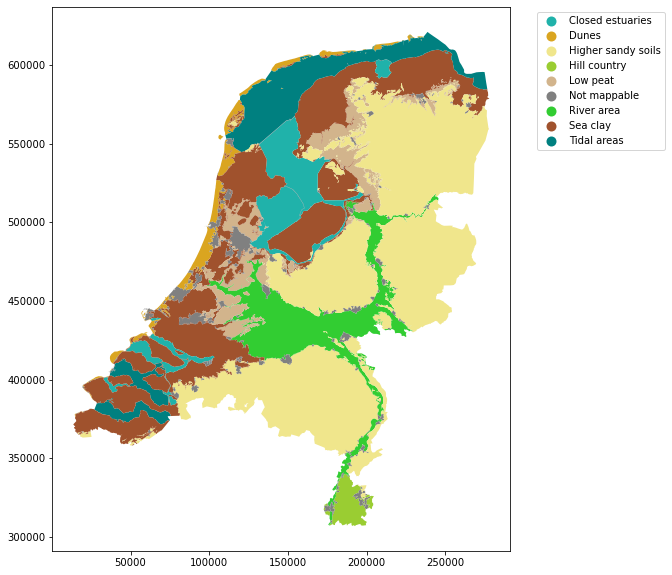

In [55]:
import matplotlib.colors as colors
f,ax= plt.subplots(figsize=(10,10))
cols = ['lightseagreen','goldenrod','khaki','yellowgreen','tan','gray','limegreen','sienna','teal']
fgr[~fgr.fgr.isin(['Noordzee'])].plot(ax=ax,column='english',legend=True, categorical=True,cmap=colors.ListedColormap(cols))
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.15, 0.8, 0.2, 0.2))

In [12]:
lmf_plot

,Plot,releve_nr,Fys_geo_regio,Jaar,Dagnummer,Pq_grootte,pH-H20,ORG_STOF,C/N,N_totaal,...,Zachte berk,Zandstruisgras,Zoete kers,Zomereik,X,Y,naam,lmf_indeling,bodemgebruik,OMSCHRIJVI
0,dr0000,NaN,hzn,2018.0,177.0,19.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,75.826,111.128,Drenthe,hzn,Landbouw en overig agrarisch,Veen
1,dr0001,NaN,hzn,2004.0,273.0,78.0,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,1.0,68.620,110.575,Drenthe,hzn,Bos,Zand
2,dr0002,NaN,hzn,2015.0,282.0,78.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,80.260,109.840,Drenthe,hzn,Bos,Zand
3,dr0003,NaN,hzn,2015.0,182.0,78.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,68.320,108.230,Drenthe,hzn,Bos,Zand
4,dr0004,NaN,hzn,2015.0,183.0,78.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,71.665,102.995,Drenthe,hzn,Bos,Zand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12915,zh99477470,NaN,duo,2017.0,139.0,240.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,-55.799,14.152,Zuid-Holland,duo,Bebouwd,Zand
12916,zh99480060,NaN,duo,2010.0,139.0,300.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,-55.616,17.191,Zuid-Holland,duo,Landbouw en overig agrarisch,Zand
12917,zh99480132,NaN,duo,2018.0,134.0,82.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,-55.490,17.003,Zuid-Holland,duo,Hoofdweg,Zand
12918,zh99480240,NaN,duo,2014.0,135.0,420.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,-55.432,17.345,Zuid-Holland,duo,Landbouw en overig agrarisch,Zand


In [13]:
import pandas as pd
import re


lmf_plot = pd.read_csv('data_plots.csv', encoding = "ISO-8859-1")

lmf_plot['X_coord_LMF_plot']=[1000*x for x in lmf_plot.X]
lmf_plot['Y_coord_LMF_plot']=[1000*y for y in lmf_plot.Y]


In [27]:
print('\n'.join(sorted(lmf_plot.Fys_geo_regio.fillna('').unique())))




afz
duo
duw
gtw
gtz
hll
hzn
hzo
hzv
hzz
lvh
lvn
riv
zkm
zkn
zkz


afz - Afgesloten zeearmen

duo - Duinen vaste land

duw - Duinen Waddeneilanden

gtw - Getijdengebied Waddeneilanden

gtz - Getijdengebied Zeeland

hll - Heuvelland Limburg

hzn - Hogere zandgronden Noord

hzo - Hogere zandgronden Oost

hzv - Hogere zandgronden Veluwe

hzz - Hogere zandgronden Zuid

lvh - Lage veen Holland

lvn - Lage veen Noord

riv - Rivierengebied

zkm - Zeeklei Midden

zkn - Zeeklei Noord

zkz - Zeeklei Zuid

In [19]:
gdf_plot = gpd.GeoDataFrame(
    lmf_plot, geometry=gpd.points_from_xy(lmf_plot.X_coord_LMF_plot, lmf_plot.Y_coord_LMF_plot),crs="EPSG:28992")


In [20]:
from tqdm import tqdm
gdf_plot['in_fgr'] = ""

for i in tqdm(range(len(gdf_plot))):
    for j in range(len(fgr)):
        inside = gdf_plot.iloc[i].geometry.within(fgr.iloc[j].geometry)
        if inside:
            gdf_plot.at[i,'in_fgr'] = fgr.iloc[j].fgr
            break


    

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1231/1231 [02:52<00:00,  7.14it/s]


In [79]:
fgr['lmf_indeling'] = ''


for i in tqdm(range(len(fgr))):
    inside = gdf_plot[gdf_plot.geometry.within(fgr.iloc[i].geometry)]
    if len(inside)>0:
        fgr.at[i,'lmf_indeling'] = inside.Fys_geo_regio.mode().values[0]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 958/958 [03:20<00:00,  4.77it/s]


In [31]:
english_fgr = pd.read_excel('LMF_Fysisch_geografische_regios_ENGLISH.xlsx',header=None)
english_fgr.columns = ['Fys_geo_regio','Volledig','English']
fgr['lmf_english'] = fgr.lmf_indeling.map(dict(zip(english_fgr.Fys_geo_regio.str.strip(' ').values,english_fgr.English.values)))

In [97]:
fgr['lmf_english'].fillna('',inplace=True)

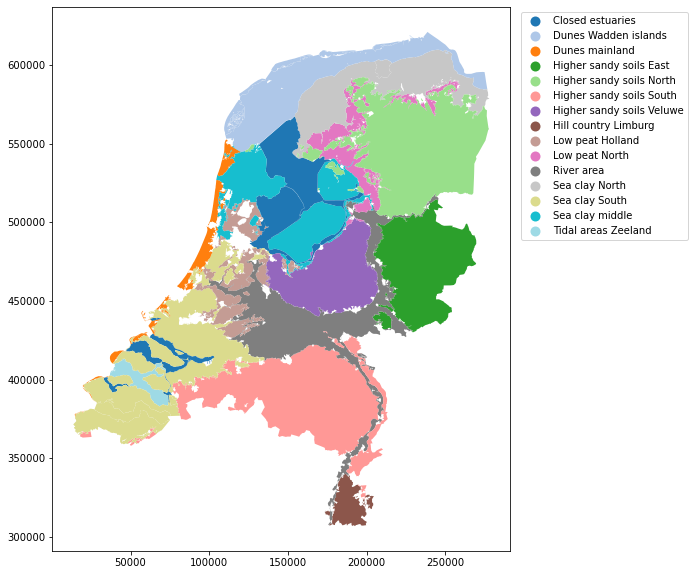

In [99]:
import matplotlib.colors as colors
f,ax= plt.subplots(figsize=(10,10))
cols = ['lightseagreen','goldenrod','khaki','yellowgreen','tan','gray','limegreen','sienna','teal']
fgr[(~fgr.fgr.isin(['Noordzee','Niet indeelbaar'])&(fgr.lmf_indeling!=''))].plot(ax=ax,column='lmf_english',legend=True, categorical=True,cmap='tab20')
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.2, 0.8, 0.2, 0.2))